In [15]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [16]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master_Smooth/p5_master_smooth.csv'
data5 = pd.read_csv(file)

In [17]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master_Smooth/p7_master_smooth.csv'
data7 = pd.read_csv(file)

In [18]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master_Smooth/p8_master_smooth.csv'
data8 = pd.read_csv(file)

In [19]:
file = '../../../../Google Drive File Stream/My Drive/USC Expeditions Year 5/Analysis/Engagement/Data/Master_Smooth/p9_master_smooth.csv'
data9 = pd.read_csv(file)

In [20]:
all_data = pd.concat([data5, data7, data8, data9], ignore_index=True, sort=True)
data = [data5, data7, data8, data9, all_data]
part = [5, 7, 8, 9]

In [7]:
data[0].columns

Index(['a_harmonicity', 'a_intensity', 'a_mfcc_0', 'a_mfcc_1',
       'a_pitch_frequency', 'a_pitch_strength', 'engagement', 'of_AU01_c',
       'of_AU02_c', 'of_AU04_c', 'of_AU05_c', 'of_AU06_c', 'of_AU07_c',
       'of_AU09_c', 'of_AU10_c', 'of_AU12_c', 'of_AU14_c', 'of_AU15_c',
       'of_AU17_c', 'of_AU20_c', 'of_AU23_c', 'of_AU25_c', 'of_AU26_c',
       'of_AU28_c', 'of_AU45_c', 'of_confidence', 'of_gaze_0_x', 'of_gaze_0_y',
       'of_gaze_0_z', 'of_gaze_1_x', 'of_gaze_1_y', 'of_gaze_1_z',
       'of_gaze_angle_x', 'of_gaze_angle_y', 'of_gaze_distance', 'of_pose_Rx',
       'of_pose_Ry', 'of_pose_Rz', 'of_pose_Tx', 'of_pose_Ty', 'of_pose_Tz',
       'of_pose_distance', 'of_success', 'of_ts_success', 'op_num_people',
       'p_aptitude', 'p_diff_1', 'p_diff_2', 'p_diff_3', 'p_diff_4',
       'p_diff_5', 'p_games_session', 'p_games_total', 'p_mistakes_game',
       'p_mistakes_session', 'p_mistakes_total', 'p_no_game', 'p_skill_EM',
       'p_skill_NC', 'p_skill_OS', 'p_ts_attempt'

In [27]:
def binary_feature_splits(feature):
    en_pos = []
    en_neg = []

    for i,d in enumerate(data):
        d_pos = d.loc[d[feature] == 1]
        d_neg = d.loc[d[feature] == 0]

        counts_pos = d_pos['engagement'].value_counts()
        counts_neg = d_neg['engagement'].value_counts()

        en_pos.append(((counts_pos[1]/len(d_pos))*100))
        en_neg.append(((counts_neg[1]/len(d_neg))*100))
    
    print('Positive')
    for p in range(0, len(part)):
        i = en_pos[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_pos[0:len(part)])), 3), end='%\n')
    print('Total', round(en_pos[-1], 3), end='%\n')
    
    print()
    
    print('Negative')
    for p in range(0, len(part)):
        i = en_neg[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_neg[0:len(part)])), 3), end='%\n')
    print('Total', round(en_neg[-1], 3), end='%\n')

    return en_pos[:-1], en_neg[:-1]


In [29]:
x = binary_feature_splits('p_no_game')

Positive
5 17.433%
7 22.822%
8 23.389%
9 31.52%
Average 23.791%
Total 22.245%

Negative
5 84.21%
7 57.007%
8 61.393%
9 49.282%
Average 62.973%
Total 60.356%


In [31]:
check = ['of_AU01_c',
       'of_AU02_c', 'of_AU04_c', 'of_AU05_c', 'of_AU06_c', 'of_AU07_c',
       'of_AU09_c', 'of_AU10_c', 'of_AU12_c', 'of_AU14_c', 'of_AU15_c',
       'of_AU17_c', 'of_AU20_c', 'of_AU23_c', 'of_AU25_c', 'of_AU26_c',
       'of_AU28_c', 'of_AU45_c']
for i in check:
    print(i)
    x = binary_feature_splits(i)
    print()

of_AU01_c
Positive
5 82.086%
7 73.455%
8 61.394%
9 71.122%
Average 72.014%
Total 73.443%

Negative
5 87.988%
7 67.125%
8 71.437%
9 73.385%
Average 74.984%
Total 75.248%

of_AU02_c
Positive
5 85.822%
7 75.681%
8 63.138%
9 79.582%
Average 76.056%
Total 77.918%

Negative
5 85.731%
7 64.616%
8 71.038%
9 68.72%
Average 72.526%
Total 72.112%

of_AU04_c
Positive
5 86.824%
7 78.146%
8 70.105%
9 72.08%
Average 76.789%
Total 76.999%

Negative
5 84.942%
7 63.625%
8 63.179%
9 73.067%
Average 71.204%
Total 72.433%

of_AU05_c
Positive
5 80.814%
7 49.482%
8 73.78%
9 68.078%
Average 68.039%
Total 64.063%

Negative
5 86.806%
7 76.839%
8 66.667%
9 73.262%
Average 75.894%
Total 76.946%

of_AU06_c
Positive
5 87.887%
7 82.927%
8 76.539%
9 72.561%
Average 79.978%
Total 80.2%

Negative
5 85.327%
7 64.832%
8 63.383%
9 72.61%
Average 71.538%
Total 72.959%

of_AU07_c
Positive
5 82.902%
7 78.296%
8 75.802%
9 60.146%
Average 74.286%
Total 75.747%

Negative
5 86.454%
7 66.955%
8 61.748%
9 74.343%
Average 72.375%
T

In [32]:
x = binary_feature_splits('of_success')

Positive
5 88.028%
7 71.606%
8 72.69%
9 78.115%
Average 77.61%
Total 78.341%

Negative
5 21.622%
7 27.522%
8 39.667%
9 25.144%
Average 28.489%
Total 27.544%


In [36]:
for i in all_data.columns:
    if 'skill' in i:
        print(i)
        x = binary_feature_splits(i)
        print()

p_skill_EM
Positive
5 87.906%
7 59.452%
8 76.771%
9 80.261%
Average 76.097%
Total 74.569%

Negative
5 63.082%
7 49.022%
8 54.618%
9 46.422%
Average 53.286%
Total 52.303%

p_skill_NC
Positive
5 84.484%
7 55.646%
8 68.452%
9 54.079%
Average 65.665%
Total 63.37%

Negative
5 52.523%
7 46.415%
8 49.016%
9 42.987%
Average 47.736%
Total 47.264%

p_skill_OS
Positive
5 83.439%
7 57.857%
8 55.591%
9 42.335%
Average 59.805%
Total 56.363%

Negative
5 55.568%
7 43.686%
8 55.111%
9 52.023%
Average 51.597%
Total 50.909%



In [37]:
def threshold_feature_splits(feature, threshold):
    en_pos = []
    en_neg = []

    for i,d in enumerate(data):
        d_pos = d.loc[d[feature] <= threshold]
        d_neg = d.loc[d[feature] > threshold]

        counts_pos = d_pos['engagement'].value_counts()
        counts_neg = d_neg['engagement'].value_counts()

        en_pos.append(((counts_pos[1]/len(d_pos))*100))
        en_neg.append(((counts_neg[1]/len(d_neg))*100))
    
    print('Less Than or Equal To')
    for p in range(0, len(part)):
        i = en_pos[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_pos[0:len(part)])), 3), end='%\n')
    print('Total', round(en_pos[-1], 3), end='%\n')
    
    print()
    
    print('Greater Than')
    for p in range(0, len(part)):
        i = en_neg[p]
        print(part[p], round(i,3), end='%\n')
    print('Average', round((np.mean(en_neg[0:len(part)])), 3), end='%\n')
    print('Total', round(en_neg[-1], 3), end='%\n')

    return en_pos[:-1], en_neg[:-1]


In [51]:
x = threshold_feature_splits('of_pose_distance', 1000)

Less Than or Equal To
5 87.392%
7 81.897%
8 73.629%
9 78.149%
Average 80.267%
Total 81.246%

Greater Than
5 43.113%
7 6.687%
8 22.502%
9 26.67%
Average 24.743%
Total 18.463%


331.4965836928029

# Time Since Analysis

In [22]:
def over_time(feature):
    start = -10
    increase = 10 
    
    end = 300
    
    answer = []
    while (start+increase <= end):
        curr = all_data.loc[(all_data[feature]>start) & (all_data[feature]<=(start+increase))]
        counts = curr['engagement'].value_counts()
        
        if 1 in counts:
            answer.append(((counts[1]/len(curr))*100))
        else:
            answer.append(0)
        
        start += increase
    return answer

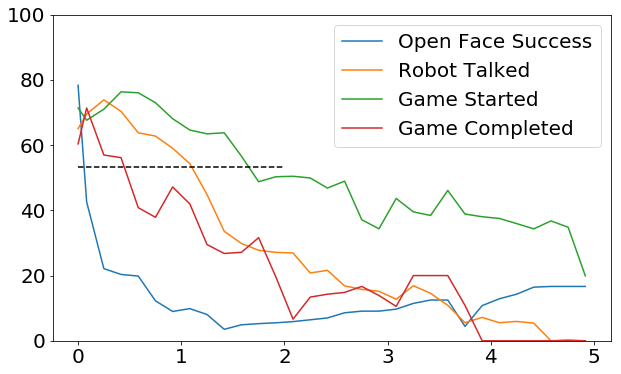

In [31]:
# Time Since
plt.rcParams["figure.figsize"] = [10,6]

over_time_vars = ['of_ts_success', 'p_ts_robot_talked', 'p_ts_game_start', 'p_ts_game_played']

labels = {
    'of_ts_success': 'Open Face Success',
    'p_ts_robot_talked': 'Robot Talked',
    'p_ts_game_start': 'Game Started',
    'p_ts_game_played': 'Game Completed',
}

index = list(range(5, ((30)*10)+5, 10))
index = [0] + index
index = [x / 60 for x in index]

for v in over_time_vars:
    curr = over_time(v)
    plt.plot(index, curr, label=labels[v])

plt.legend(loc='best')
threshold = 53.137
plt.plot([0, 2], [threshold, threshold], "k--")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 100)
plt.legend(prop={'size': 20})

plt.show()

# Open Face Analysis

In [33]:
def over_feature(feature):
    answer = []
    for i in range(0, 100, 5):
        t1 = np.nanpercentile(all_data[feature], i)
        t2 = np.nanpercentile(all_data[feature], i+5)
        
        curr = all_data.loc[(all_data[feature]>=t1) & (all_data[feature]<=t2)]
        counts = curr['engagement'].value_counts()
        
        if 1 in counts:
            answer.append(((counts[1]/len(curr))*100))
        else:
            answer.append(0)
            
    return answer

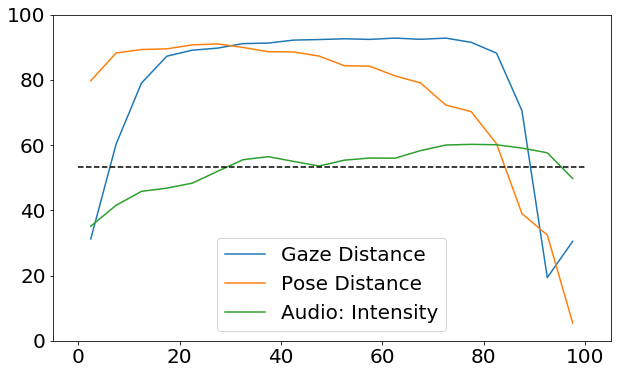

In [37]:
# Percentile Features
plt.rcParams["figure.figsize"] = [10,6]

percentile_vars = ['of_gaze_distance', 'of_pose_distance', 'a_intensity']

labels = {
    'of_gaze_distance': 'Gaze Distance',
    'of_pose_distance': 'Pose Distance',
    'a_intensity': 'Audio: Intensity',
}

index = range(0,100,5)
index = [x + 2.5 for x in index]

for v in percentile_vars:
    curr = over_feature(v)
    plt.plot(index, curr, label=labels[v])

plt.legend(loc='lower center')
threshold = 53.137
plt.plot([0, 100], [threshold, threshold], "k--")

plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0, 100)
plt.legend(prop={'size': 20})

plt.show()